# 🚗 Uber Rides Data Analysis using Python

We will analyze Uber ride data to understand patterns in categories, purposes, timings, distances, and more.

## Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## Step 2: Load the Dataset

We'll load the Uber dataset. **Make sure `UberDataset.csv` is in the same folder as this notebook.**

If you don't have the dataset, you can download it from the link provided in the tutorial.

In [2]:
# Load the dataset
try:
    dataset = pd.read_csv("UberDataset.csv")
    print(f"Dataset loaded successfully! Shape: {dataset.shape}")
    print(f"\nFirst 5 rows:")
    dataset.head()
except FileNotFoundError:
    print("Error: 'UberDataset.csv' not found. Please place the file in the current directory.")

Dataset loaded successfully! Shape: (1156, 7)

First 5 rows:


## Step 3: Understand the Dataset Structure

In [3]:
# Check dataset shape
print(f"Dataset shape: {dataset.shape}")
print(f"\nDataset info:")
dataset.info()

# Check for missing values
print("\nMissing values:")
print(dataset.isnull().sum())

Dataset shape: (1156, 7)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB

Missing values:
START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64


## Step 4: Data Preprocessing

### 4.1 Handle Missing Values in PURPOSE Column

In [4]:
# Fill missing PURPOSE values with "NOT"
dataset['PURPOSE'].fillna("NOT", inplace=True)
print("Missing PURPOSE values filled with 'NOT'")
print(f"Unique purposes now: {dataset['PURPOSE'].unique()}")

Missing PURPOSE values filled with 'NOT'
Unique purposes now: ['Meal/Entertain' 'NOT' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


### 4.2 Convert START_DATE and END_DATE to datetime

In [5]:
# Convert to datetime format
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors='coerce')

print("START_DATE and END_DATE converted to datetime")
dataset[['START_DATE', 'END_DATE']].head()

START_DATE and END_DATE converted to datetime


,START_DATE,END_DATE
0,2016-01-01 21:11:00,2016-01-01 21:17:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00


### 4.3 Extract Date, Time, and Day/Night Categories

In [6]:
# Extract date and hour
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

# Categorize into day/night periods
dataset['day-night'] = pd.cut(x=dataset['time'],
                              bins=[0, 10, 15, 19, 24],
                              labels=['Morning', 'Afternoon', 'Evening', 'Night'],
                              right=False)

print("Date and time features extracted:")
print(dataset[['date', 'time', 'day-night']].head())

Date and time features extracted:
         date  time  day-night
0  2016-01-01  21.0      Night
1  2016-01-02   1.0    Morning
2  2016-01-02  20.0      Night
3  2016-01-05  17.0    Evening
4  2016-01-06  14.0  Afternoon


### 4.4 Drop Rows with Null Values and Duplicates

In [7]:
# Drop rows with any null values
initial_shape = dataset.shape
dataset.dropna(inplace=True)
print(f"Rows after dropping nulls: {dataset.shape[0]} (dropped {initial_shape[0] - dataset.shape[0]})")

# Drop duplicate rows
initial_shape = dataset.shape
dataset.drop_duplicates(inplace=True)
print(f"Rows after dropping duplicates: {dataset.shape[0]} (dropped {initial_shape[0] - dataset.shape[0]})")

print(f"\nFinal dataset shape: {dataset.shape}")

Rows after dropping nulls: 420 (dropped 736)
Rows after dropping duplicates: 420 (dropped 0)

Final dataset shape: (420, 10)


## Step 5: Data Visualization

### 5.1 Check Unique Values in Categorical Columns

In [8]:
# Identify object-type columns
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print(f"Categorical columns: {object_cols}")

# Count unique values in each categorical column
unique_values = {}
for col in object_cols:
    unique_values[col] = dataset[col].nunique()

print("\nUnique values in categorical columns:")
for col, count in unique_values.items():
    print(f"- {col}: {count}")

Categorical columns: ['CATEGORY', 'START', 'STOP', 'PURPOSE', 'date']

Unique values in categorical columns:
- CATEGORY: 2
- START: 109
- STOP: 113
- PURPOSE: 7
- date: 114


### 5.2 Count Plots for CATEGORY and PURPOSE

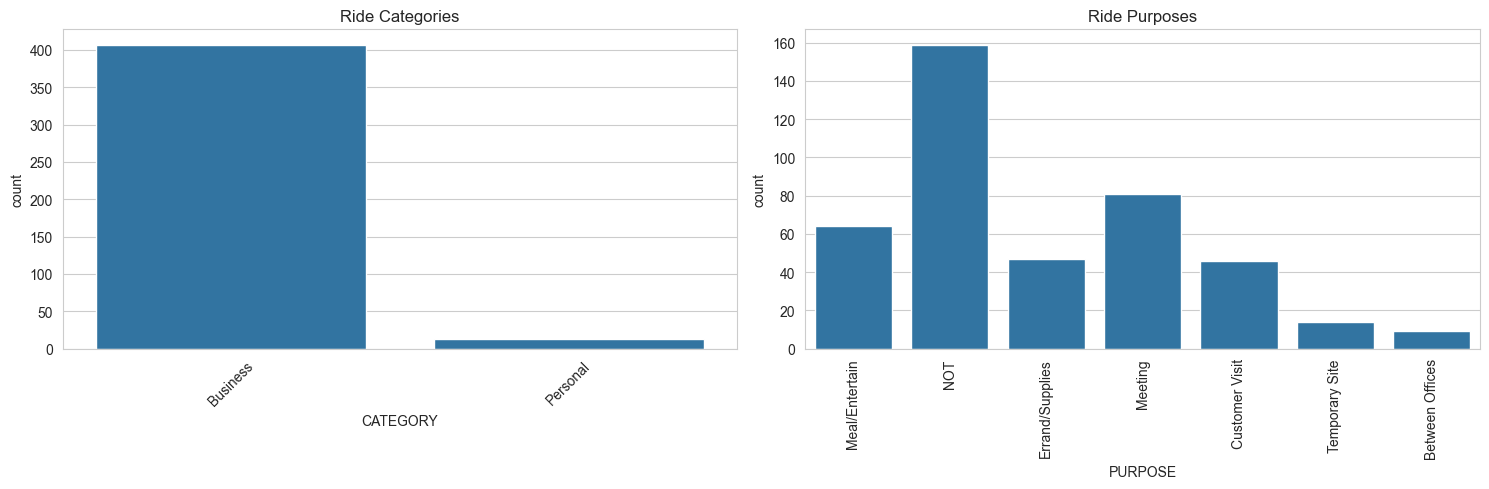

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x='CATEGORY')
plt.title('Ride Categories')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=dataset, x='PURPOSE')
plt.title('Ride Purposes')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Insights:**
- Most rides are for **Business** purposes
- Top purposes: **Meetings** and **Meal/Entertain**

### 5.3 Ride Distribution by Time of Day

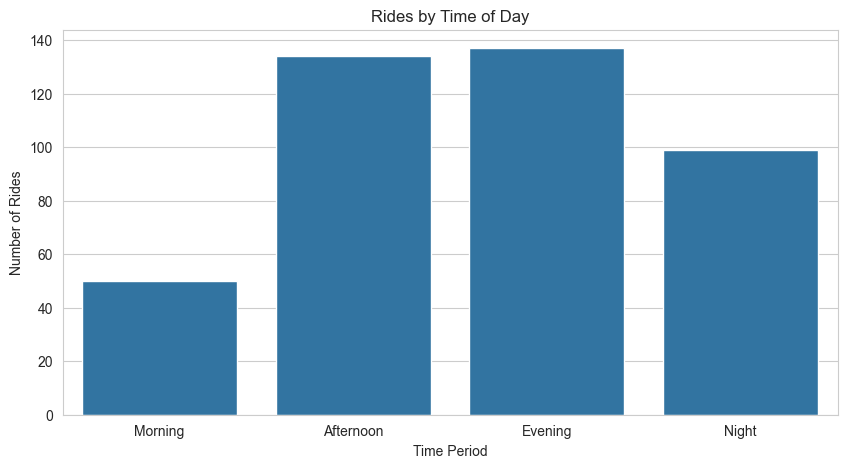

Most rides are booked during Afternoon (10am-5pm)


In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='day-night', order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Rides by Time of Day')
plt.xlabel('Time Period')
plt.ylabel('Number of Rides')
plt.show()

print("Most rides are booked during Afternoon (10am-5pm)")

### 5.4 PURPOSE vs CATEGORY Comparison

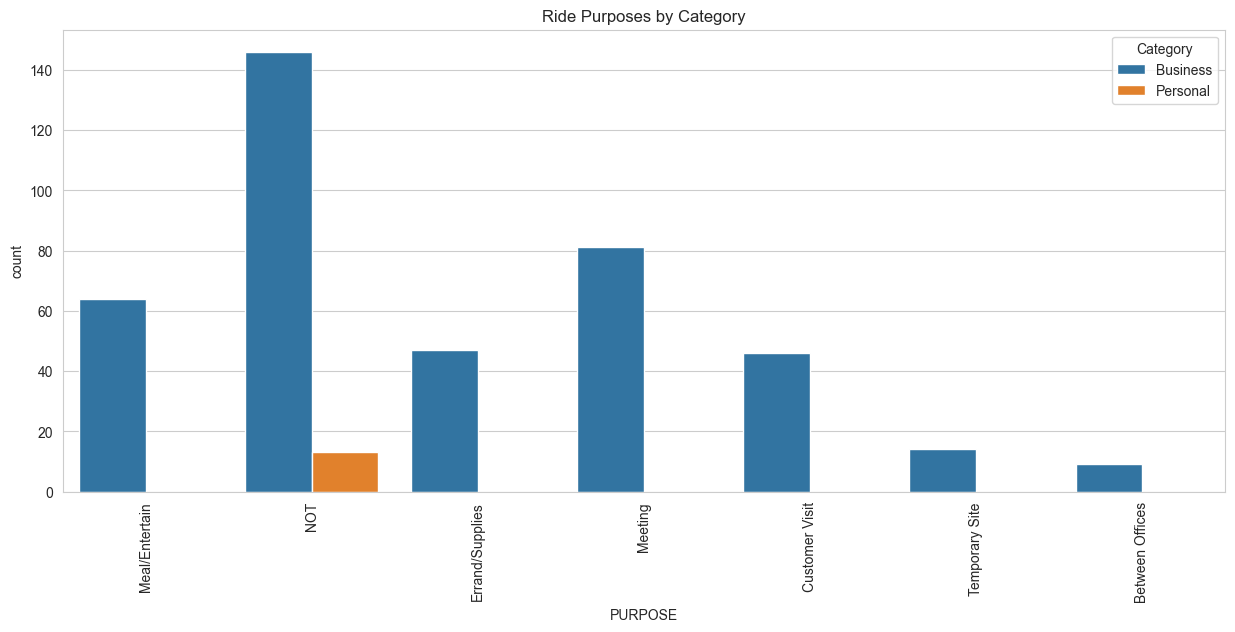

In [11]:
plt.figure(figsize=(15, 6))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.title('Ride Purposes by Category')
plt.xticks(rotation=90)
plt.legend(title='Category')
plt.show()

## Step 6: Feature Engineering for Correlation Analysis

### 6.1 One-Hot Encode CATEGORY and PURPOSE

In [12]:
# Select columns to encode
encode_cols = ['CATEGORY', 'PURPOSE']

# Apply OneHotEncoder
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[encode_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out(encode_cols)

# Drop original columns and concatenate encoded ones
df_final = dataset.drop(encode_cols, axis=1)
dataset_encoded = pd.concat([df_final, OH_cols], axis=1)

print(f"Original shape: {dataset.shape}")
print(f"Encoded shape: {dataset_encoded.shape}")
print("\nFirst few encoded columns:")
dataset_encoded.iloc[:, :10].head()

Original shape: (420, 10)
Encoded shape: (420, 17)

First few encoded columns:


,START_DATE,END_DATE,START,STOP,MILES,date,time,day-night,CATEGORY_Business,CATEGORY_Personal
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Fort Pierce,Fort Pierce,5.1,2016-01-01,21.0,Night,1.0,0.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Fort Pierce,Fort Pierce,5.0,2016-01-02,1.0,Morning,1.0,0.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Fort Pierce,Fort Pierce,4.8,2016-01-02,20.0,Night,1.0,0.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Fort Pierce,Fort Pierce,4.7,2016-01-05,17.0,Evening,1.0,0.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Fort Pierce,West Palm Beach,63.7,2016-01-06,14.0,Afternoon,1.0,0.0


### 6.2 Correlation Heatmap

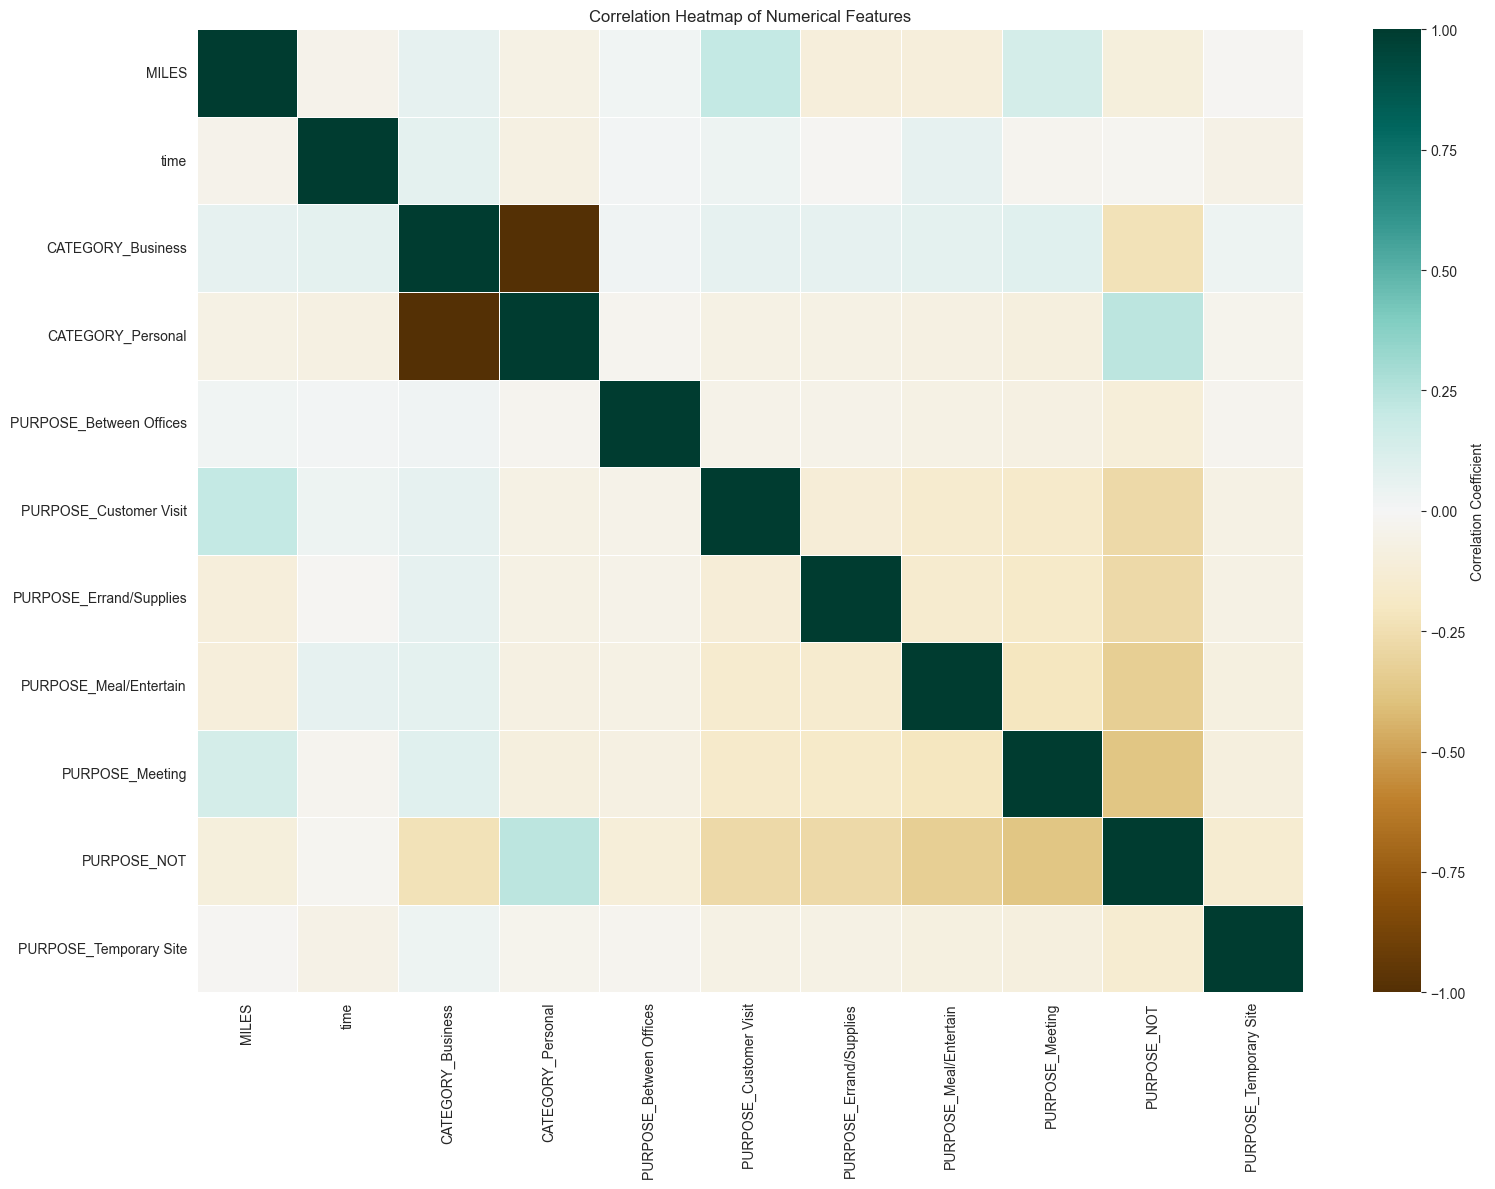

Key observation: Business and Personal categories are highly negatively correlated.


In [13]:
# Select only numerical columns for correlation
numeric_dataset = dataset_encoded.select_dtypes(include=['number'])

plt.figure(figsize=(16, 12))
sns.heatmap(numeric_dataset.corr(), 
            cmap='BrBG', 
            fmt='.2f', 
            linewidths=0.5, 
            annot=False,  # Set to True to see values, but it's crowded
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

print("Key observation: Business and Personal categories are highly negatively correlated.")

## Step 7: Monthly Analysis

In [14]:
# Extract month from START_DATE
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month

# Map month numbers to names
month_label = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
               5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
               9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)

# Count rides per month
month_counts = dataset['MONTH'].value_counts(sort=False)

# Create dataframe with monthly stats
monthly_stats = pd.DataFrame({
    "Total Rides": month_counts,
    "Max Miles": dataset.groupby('MONTH', sort=False)['MILES'].max()
})

print("Monthly Statistics:")
monthly_stats

Monthly Statistics:


,Total Rides,Max Miles
MONTH,,
Jan,23,63.7
Feb,40,23.3
Mar,42,17.3
Apr,25,174.2
May,26,25.6
Jun,42,22.3
Jul,40,13.6
Aug,43,31.9
Sep,13,69.1


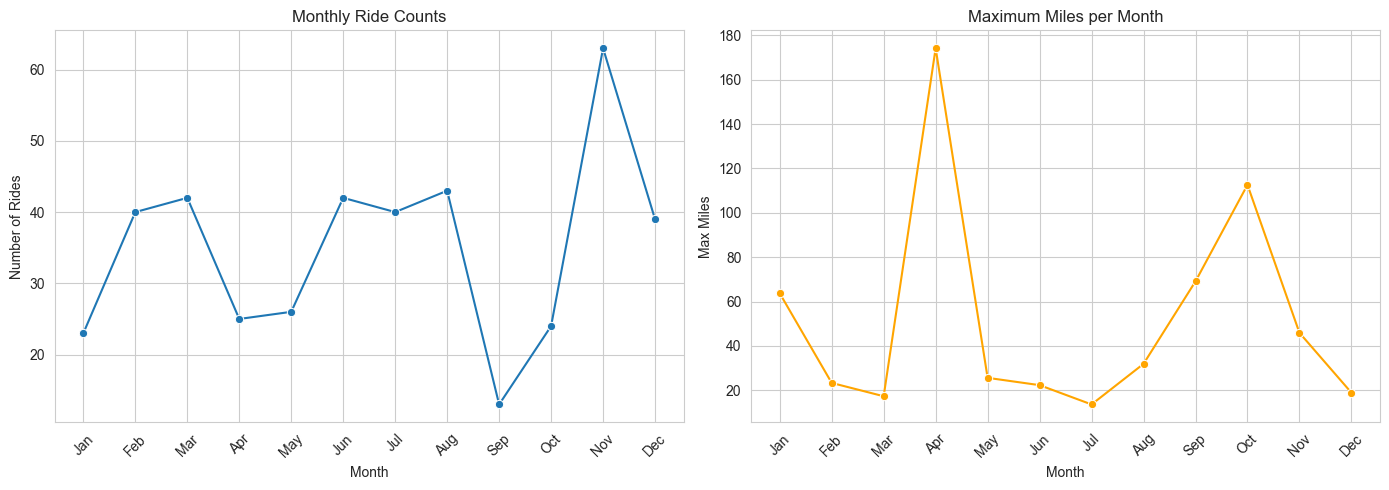

Observation: Fewer rides in winter months (Nov-Jan)


In [15]:
# Plot monthly trends
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.lineplot(data=monthly_stats, x=monthly_stats.index, y='Total Rides', marker='o')
plt.title('Monthly Ride Counts')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.lineplot(data=monthly_stats, x=monthly_stats.index, y='Max Miles', marker='o', color='orange')
plt.title('Maximum Miles per Month')
plt.xlabel('Month')
plt.ylabel('Max Miles')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Observation: Fewer rides in winter months (Nov-Jan)")

## Step 8: Day of Week Analysis

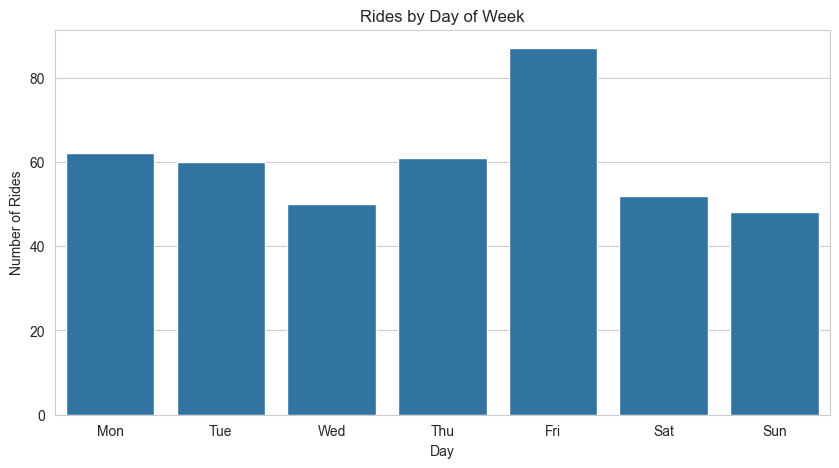

In [16]:
# Extract day of week (0=Monday, 6=Sunday)
dataset['DAY'] = pd.DatetimeIndex(dataset['START_DATE']).weekday

# Map to day names
day_label = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
dataset['DAY'] = dataset['DAY'].map(day_label)

# Count rides per day
day_counts = dataset['DAY'].value_counts()

# Reorder for proper display
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
day_counts = day_counts.reindex(day_order)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title('Rides by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Rides')
plt.show()

## Step 9: MILES Distribution Analysis

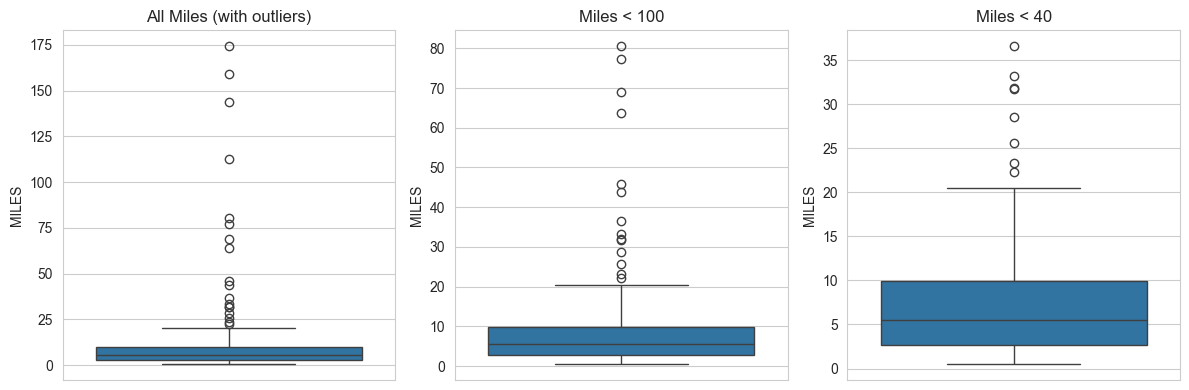

In [17]:
# Boxplot of all MILES
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.boxplot(y=dataset['MILES'])
plt.title('All Miles (with outliers)')

plt.subplot(1, 3, 2)
sns.boxplot(y=dataset[dataset['MILES'] < 100]['MILES'])
plt.title('Miles < 100')

plt.subplot(1, 3, 3)
sns.boxplot(y=dataset[dataset['MILES'] < 40]['MILES'])
plt.title('Miles < 40')

plt.tight_layout()
plt.show()

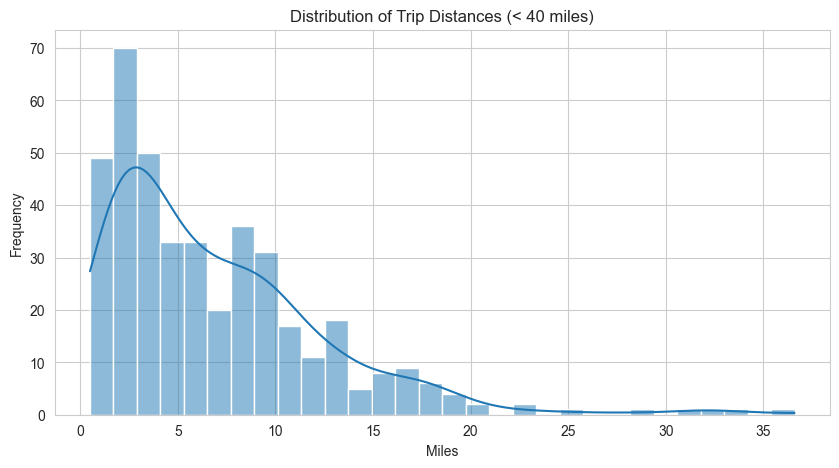

Key insights:
- Most trips are 4-5 miles
- Majority of trips are under 20 miles
- Trips over 20 miles are rare


In [18]:
# Distribution plot for short trips
plt.figure(figsize=(10, 5))
sns.histplot(dataset[dataset['MILES'] < 40]['MILES'], bins=30, kde=True)
plt.title('Distribution of Trip Distances (< 40 miles)')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

print("Key insights:")
print("- Most trips are 4-5 miles")
print("- Majority of trips are under 20 miles")
print("- Trips over 20 miles are rare")

## Summary of Key Insights

From this analysis, we discovered:

1. **Ride Purpose**: Most rides are for **Business**, especially **Meetings** and **Meal/Entertain**
2. **Peak Timing**: Afternoon (10am-5pm) is the busiest time
3. **Seasonal Pattern**: Fewer rides in winter months (Nov-Jan)
4. **Trip Distance**: 
   - Most trips are **4-5 miles**
   - Majority are **under 20 miles**
   - Long trips (>20 miles) are rare
5. **Category Correlation**: Business and Personal categories are strongly negatively correlated